<a href="https://colab.research.google.com/github/Chanzwastaken/ML-ds_salaries/blob/main/ds_salaries_DTreeKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('ds_salaries.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
# Selecting categorical columns
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size', 'salary_currency']

# Creating label encoders for categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
print(df.head())

   Unnamed: 0  work_year  experience_level  employment_type  job_title  \
0           0       2020                 2                2         22   
1           1       2020                 3                2         41   
2           2       2020                 3                2          7   
3           3       2020                 2                2         47   
4           4       2020                 3                2         38   

   salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0   70000                7          79833                  14             0   
1  260000               16         260000                  32             0   
2   85000                8         109024                  20            50   
3   20000               16          20000                  23             0   
4  150000               16         150000                  55            50   

   company_location  company_size  
0                12             0  
1       

# **Decission Tree**

In [ ]:
#DECISION TREE
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
# Function to import the dataset
def importdata():
  balance_data = df
# Displaying dataset information
  print("Dataset Length: ", len(balance_data))
  print("Dataset Shape: ", balance_data.shape)
  print("Dataset: ", balance_data.head())
  return balance_data

In [ ]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.drop(['company_size'], axis=1)
    Y = balance_data['company_size']
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=100)
    return X, Y, X_train, X_test, y_train, y_test

In [ ]:
def train_using_gini(X_train, X_test, y_train):
  # Creating the classifier object
  clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3,
  min_samples_leaf=5)
  # Performing training
  clf_gini.fit(X_train, y_train)
  return clf_gini

In [ ]:
def train_using_entropy(X_train, X_test, y_train):
  # Decision tree with entropy
  clf_entropy = DecisionTreeClassifier(
  criterion="entropy", random_state=100,
  max_depth=3, min_samples_leaf=5)
  # Performing training
  clf_entropy.fit(X_train, y_train)
  return clf_entropy

In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):
  y_pred = clf_object.predict(X_test)
  print("Predicted values:")
  print(y_pred)
  return y_pred
# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
  print("Confusion Matrix: ",
  confusion_matrix(y_test, y_pred))
  print("Accuracy : ",
  accuracy_score(y_test, y_pred)*100)
  print("Report : ",
  classification_report(y_test, y_pred))

In [ ]:
if __name__ == "__main__":
  data = importdata()
  X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
  clf_gini = train_using_gini(X_train, X_test, y_train)
  clf_entropy = train_using_entropy(X_train, X_test, y_train)


Dataset Length:  607
Dataset Shape:  (607, 12)
Dataset:     Unnamed: 0  work_year  experience_level  employment_type  job_title  \
0           0       2020                 2                2         22   
1           1       2020                 3                2         41   
2           2       2020                 3                2          7   
3           3       2020                 2                2         47   
4           4       2020                 3                2         38   

   salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0   70000                7          79833                  14             0   
1  260000               16         260000                  32             0   
2   85000                8         109024                  20            50   
3   20000               16          20000                  23             0   
4  150000               16         150000                  55            50   

   company_location  co

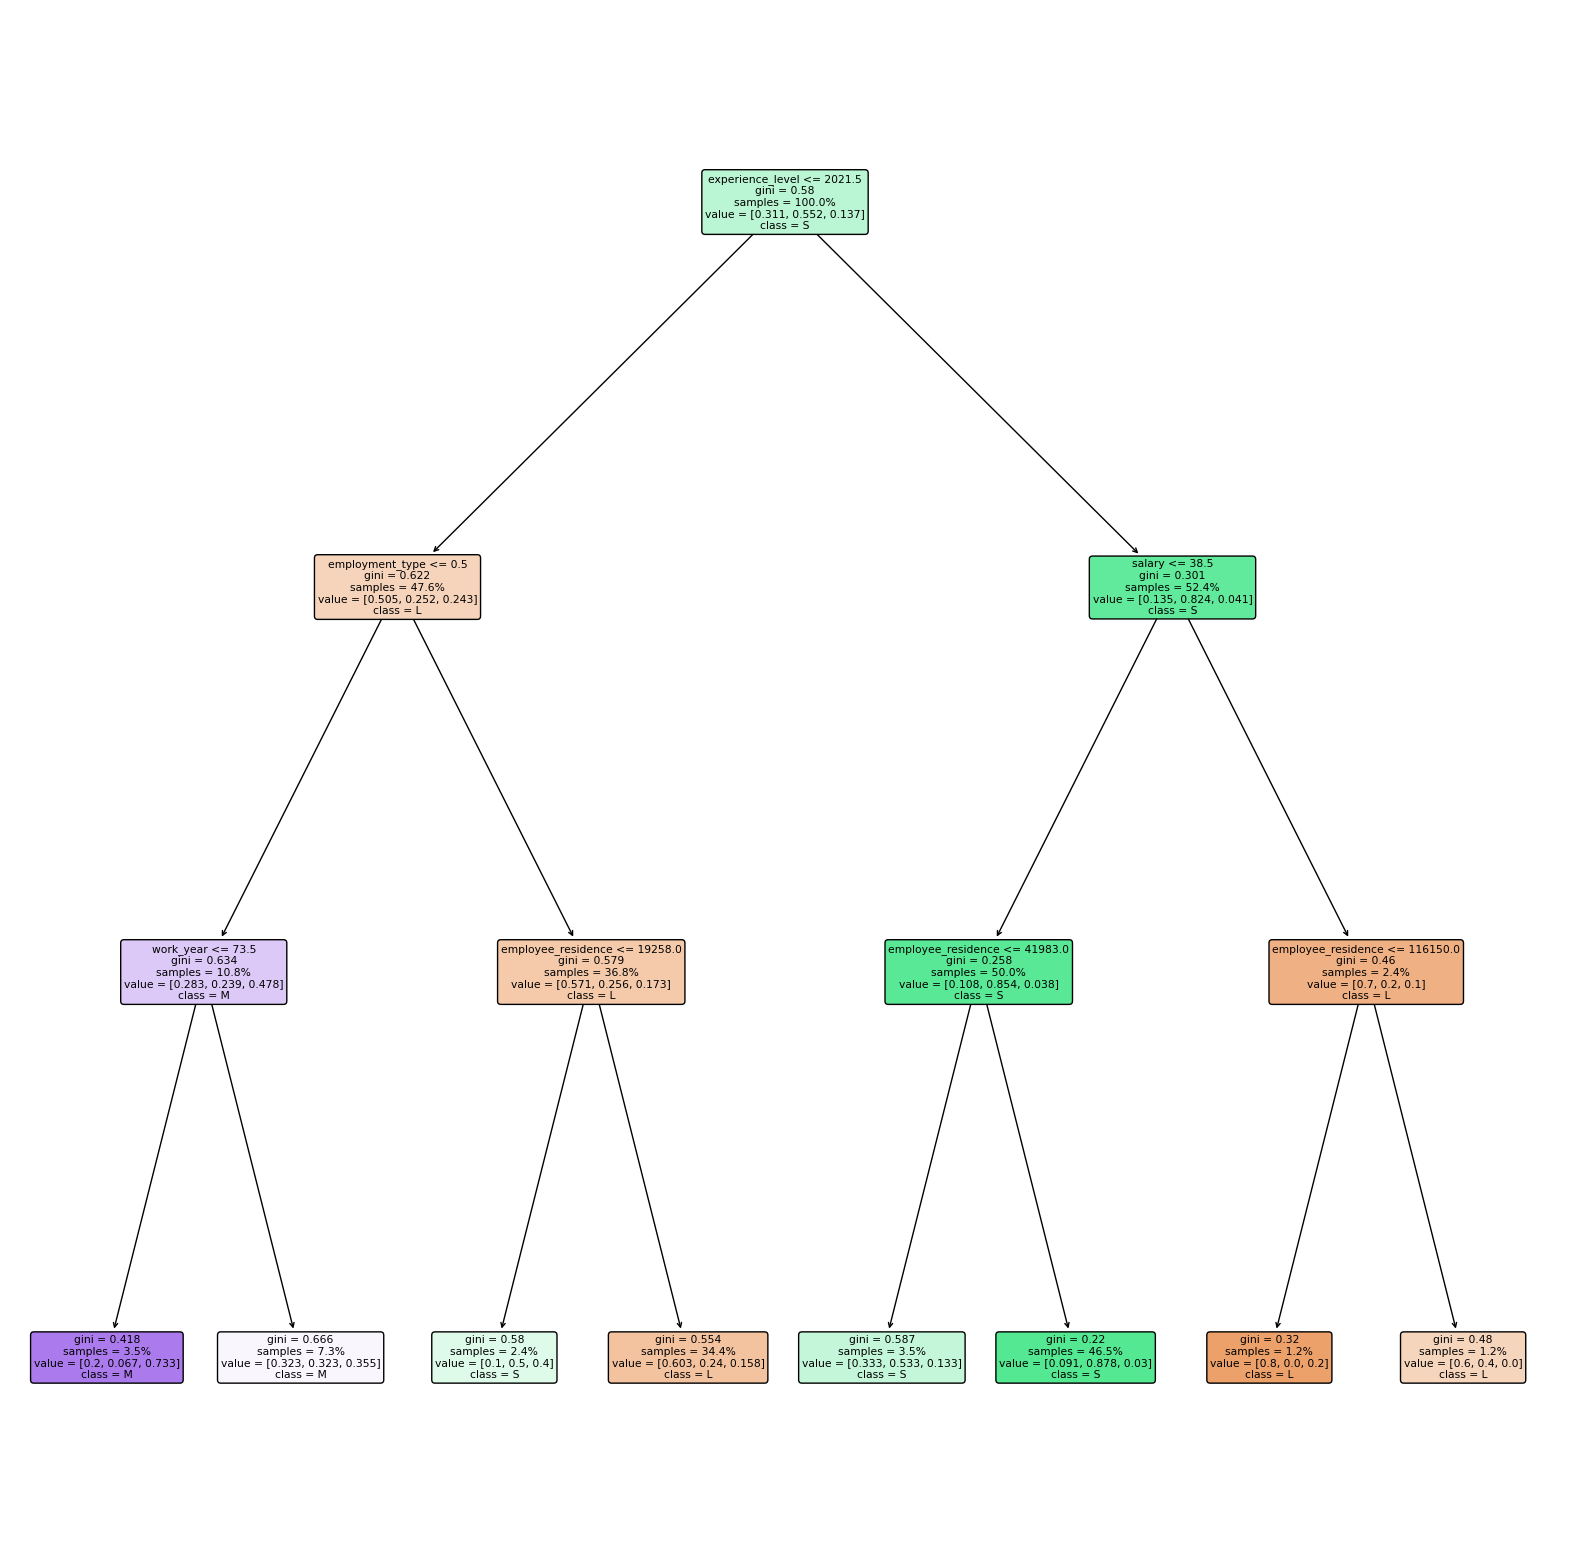

In [ ]:
from sklearn import tree
# Putting the feature names and class names into variables
fn = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location']
cn = ['L', 'S', 'M']

#size
plt.figure (figsize= (20, 20))

tree.plot_tree(clf_gini,
 feature_names=fn,
 class_names=cn,
 rounded=True, # Rounded node edges
 filled=True, # Adds color according to class
 proportion=True);

In [ ]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Gini Index:
Predicted values:
[1 1 0 1 1 1 1 2 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 2 0 0 0 0 2 0 1 1 0 1 1 1 1 1 0 0 1 2 0 1 1 0 1 1 0 0 0 1 0 2 0 0 1 1 0 0
 2 0 1 1 0 2 0 1 0 1 0 1 1 0 0 1 2 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 2 1 2 1 1 0 0 1 0 1 1 1 0 1 1 2 1 1 1 0 2 0 1 1 1 0 2 2 1 0 1 1 0 1 2
 1 1 2 1 0 0 0 1 1 1 0 1 0 2 0 0 1 1 1 2 1 1 2 2 1 1 1 0 2 1 0 0 1 0 0]
Confusion Matrix:  [[40 16 10]
 [10 76  6]
 [14  6  5]]
Accuracy :  66.12021857923497
Report :                precision    recall  f1-score   support

           0       0.62      0.61      0.62        66
           1       0.78      0.83      0.80        92
           2       0.24      0.20      0.22        25

    accuracy                           0.66       183
   macro avg       0.55      0.54      0.54       183
weighted avg       0.65      0.66      0.65       183

Results Using Entropy:
Predicted values:
[1 1 0 1 1 1 0 2 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1

# **KNN**

In [ ]:
#KNN
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading data
data = df
# Create feature and target arrays
X = data.drop(['company_size'], axis=1)
y = data['company_size']
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
# Predict on dataset which model has not seen before
print(knn.predict(X_test))
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))


[1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 2 1 1 2 0 1 1 0 1 1 1 1 2 0 1 1
 1 0 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 0 1 1 1 1 1 0 2 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1
 0 0 1 1 0 0 1 1 1 1 1]
0.45081967213114754


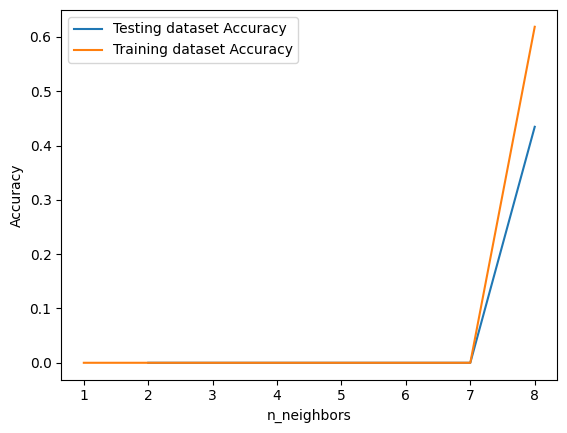

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
# Compute training and test data accuracy
train_accuracy[i] = knn.score(X_train, y_train)
test_accuracy[i] = knn.score(X_test, y_test)
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()